<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cross-validation-and-confidence-intervals" data-toc-modified-id="Cross-validation-and-confidence-intervals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cross validation and confidence intervals</a></span><ul class="toc-item"><li><span><a href="#Confidence-intervals-and-standard-error" data-toc-modified-id="Confidence-intervals-and-standard-error-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Confidence intervals and standard error</a></span></li><li><span><a href="#Example:-accuracy-with--iris-SVM-classification" data-toc-modified-id="Example:-accuracy-with--iris-SVM-classification-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Example: accuracy with  iris SVM classification</a></span></li><li><span><a href="#Comparing-two-methods" data-toc-modified-id="Comparing-two-methods-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Comparing two methods</a></span></li></ul></li></ul></div>

# Cross validation and confidence intervals

We show how to compute 95% confidence intervals when doing cross validation.

The computation  in <https://scikit-learn.org/stable/modules/cross_validation.html> is not correct, as it does not depend on the number of folds.

## Confidence intervals and standard error

* See <https://en.wikipedia.org/wiki/Standard_error#Assumptions_and_usage>

* If we do $k$-fold cross validation, and we have a mean score $\mu$ with standard deviation $\sigma$, then the *standard error* SE= $\sigma/\sqrt{k}$.
* The confidence interval then is $\mu  {+}{/}{-} 1.96\cdot SE$.
* In <https://scikit-learn.org/stable/modules/cross_validation.html>, the confidence interval is computed as $\mu  {+}{/}{-} 2\cdot \sigma$, which makes it (with k=5) roughly twice as large on both sides.

## Example: accuracy with  iris SVM classification 

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import seaborn as sns
%matplotlib inline 

iris = datasets.load_iris()
iris.data.shape, iris.target.shape


((150, 4), (150,))

In [32]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)

k=5 # see what happens when we change this to 10

scores = cross_val_score(clf, iris.data, iris.target, cv=k)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [33]:
# from https://scikit-learn.org/stable/modules/cross_validation.html
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


In [34]:
# Better


print("Accuracy: %0.2f (+/- %0.3f)" % (scores.mean(), 1.96 * scores.std()/np.sqrt(k) ))

Accuracy: 0.98 (+/- 0.014)


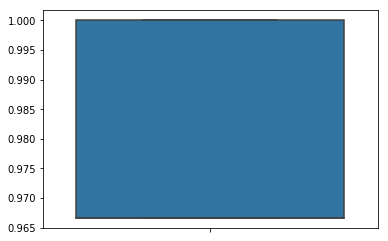

In [35]:
sns.boxplot(scores,orient='v');

## Comparing two methods

When comparing two methods, we want to have some indication of the significance of the differences.

We can say that **there is no difference** if their 95% confidence intervals overlap.